In [ ]:
#Reading the dataset :
#converting .txt to .csv file
#naming the columns 
#importing dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
pd.read_csv('iris.data.csv', delimiter=";")

In [ ]:
iris=pd.read_csv('iris.data.csv', delimiter=";")
#Converting categorical to numerical so we can use knn
iris['variety']=iris['variety'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

#Choosing the features as x and the target as y
x=iris[['sepal.length','sepal.width','petal.length','petal.width']]
y=iris['variety']
iris
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) 

In [ ]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Text(0, 0.5, 'Testing Accuracy')

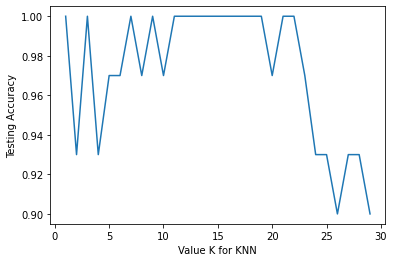

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

We'll choose k = 20

In [ ]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.66,random_state=30) #split our data with test size of 66% 

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Accuracy=',accuracy_score(y_pred,y_test))

In [ ]:
#distance calculation :
import pandas as pd
import numpy as np
import math
import operator

def euclidianDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
       
    return np.sqrt(distance)
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
    length = testInstance.shape[1]
    print(length)
    
    
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
      dist = euclidianDistance(testInstance, trainingSet.iloc[x], length)
      distances[x] = dist[0]
      # Sorting them on the basis of distance
      sorted_d = sorted(distances.items(), key=operator.itemgetter(1)) #by using it we store indices also
      sorted_d1 = sorted(distances.items())
      print(sorted_d[:5])
      print(sorted_d1[:5])
   
    neighbors = []
# Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
        counts = {"Iris-setosa":0,"Iris-versicolor":0,"Iris-virginica":0}
# Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
            print(counts)
            sortedVotes = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
            print(sortedVotes)
    return(sortedVotes[0][0], neighbors)